# 🌸 Análisis del Dataset Iris con Visualizaciones
## Procesamiento de datos y gráficas avanzadas

## 1. Carga y Exploración Inicial

In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Cargar dataset
iris = load_iris()
print("Dataset Iris cargado!")
print(f"Características: {iris.feature_names}")
print(f"Etiquetas: {iris.target_names}")

# Crear DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\nPrimeras filas del dataset:")
display(df.head())

Dataset Iris cargado!
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Etiquetas: ['setosa' 'versicolor' 'virginica']

Primeras filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Estadísticas Descriptivas

In [3]:
# %%
# Resumen estadístico
print("Resumen estadístico:")
display(df.describe())

# Distribución de especies
print("\nDistribución de especies:")
print(df['species_name'].value_counts())


Resumen estadístico:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Distribución de especies:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. Visualizaciones Básicas

<Figure size 1200x800 with 0 Axes>

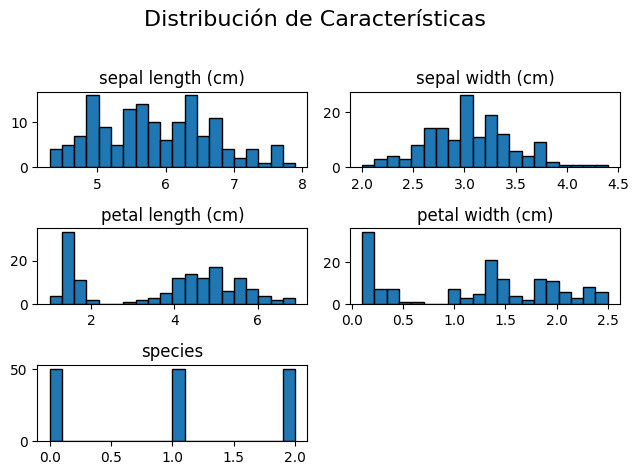

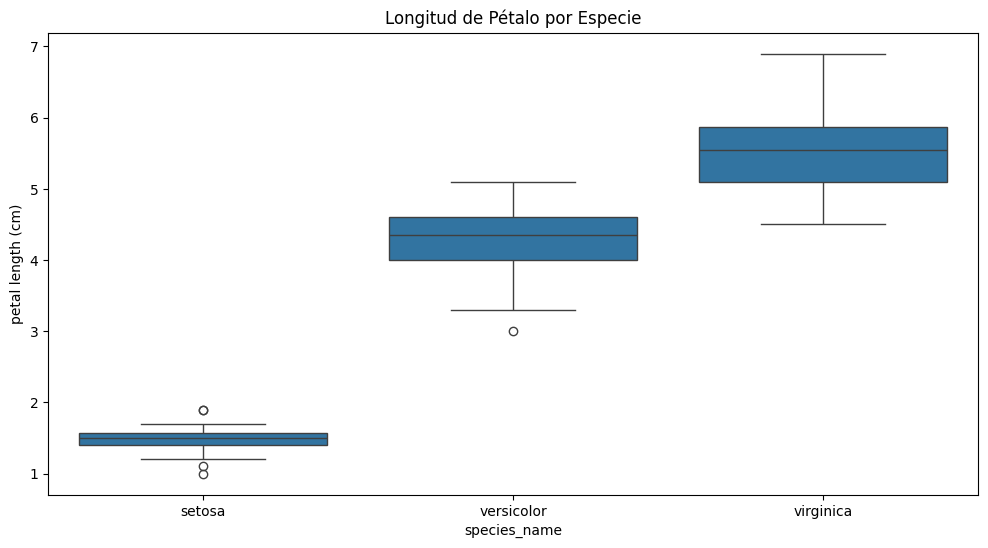

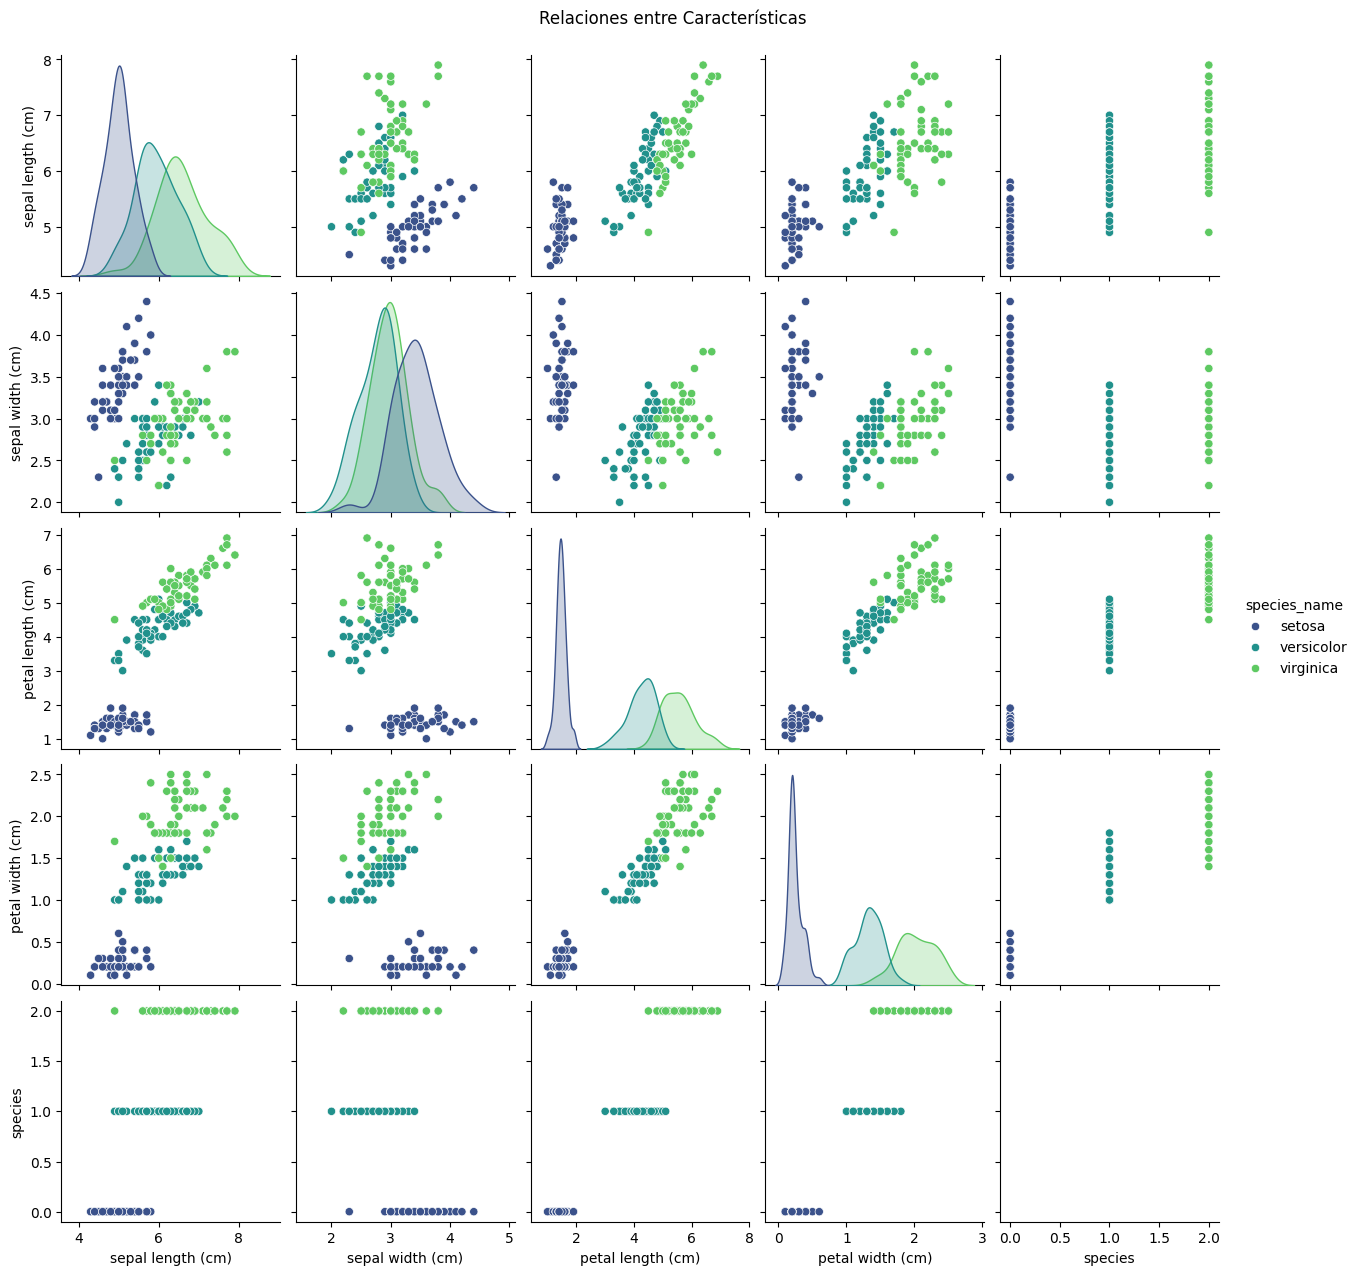

In [4]:

# %%
# Histogramas para cada característica
plt.figure(figsize=(12, 8))
df.hist(bins=20, edgecolor='black', grid=False)
plt.suptitle('Distribución de Características', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# %%
# Boxplots por especie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species_name', y='petal length (cm)')
plt.title('Longitud de Pétalo por Especie')
plt.show()

# %%
# Pairplot para relaciones entre variables
sns.pairplot(df, hue='species_name', palette='viridis')
plt.suptitle('Relaciones entre Características', y=1.02)
plt.show()


## 5. Análisis Avanzado


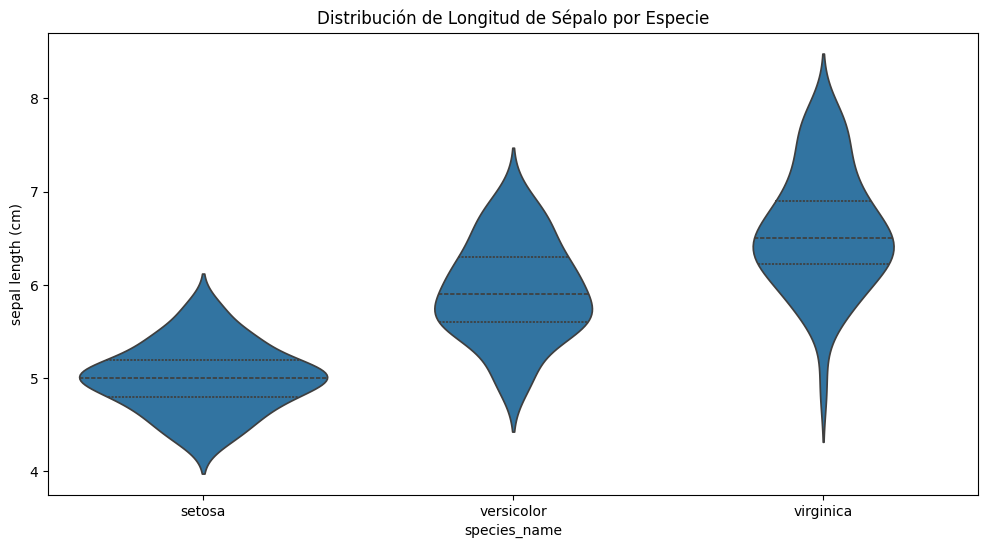

/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/tmp/ipython-input-703212578.py:29: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 3
  plt.legend(handles=scatter.legend_elements()[0],
/tmp/ipython-input-703212578.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=scatter.legend_elements()[0],


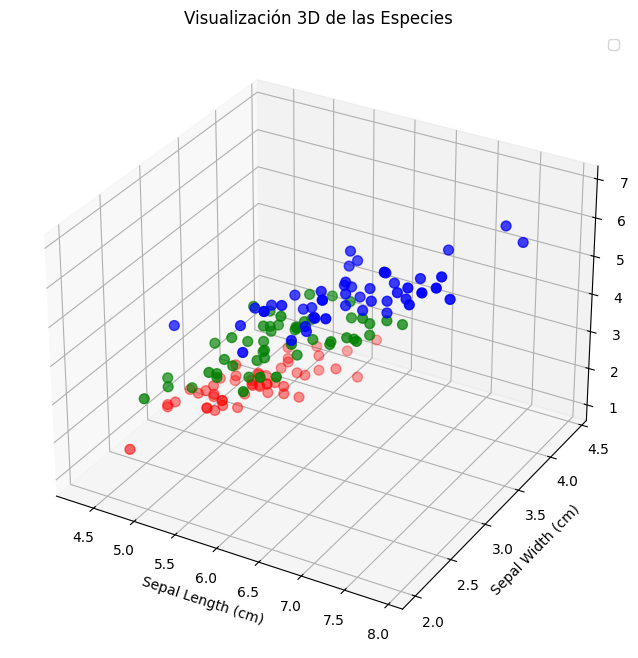

In [5]:
# Violin plots para comparar distribuciones
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='species_name', y='sepal length (cm)', inner='quartile')
plt.title('Distribución de Longitud de Sépalo por Especie')
plt.show()

# %%
# Gráfico 3D interactivo
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a cada especie
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
species_colors = df['species_name'].map(colors)

# Graficar
scatter = ax.scatter(df['sepal length (cm)'],
                   df['sepal width (cm)'],
                   df['petal length (cm)'],
                   c=species_colors, s=50)

# Etiquetas y título
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Visualización 3D de las Especies')
plt.legend(handles=scatter.legend_elements()[0],
           labels=iris.target_names)
plt.show()


## 6. Procesamiento de Datos


Datos normalizados:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


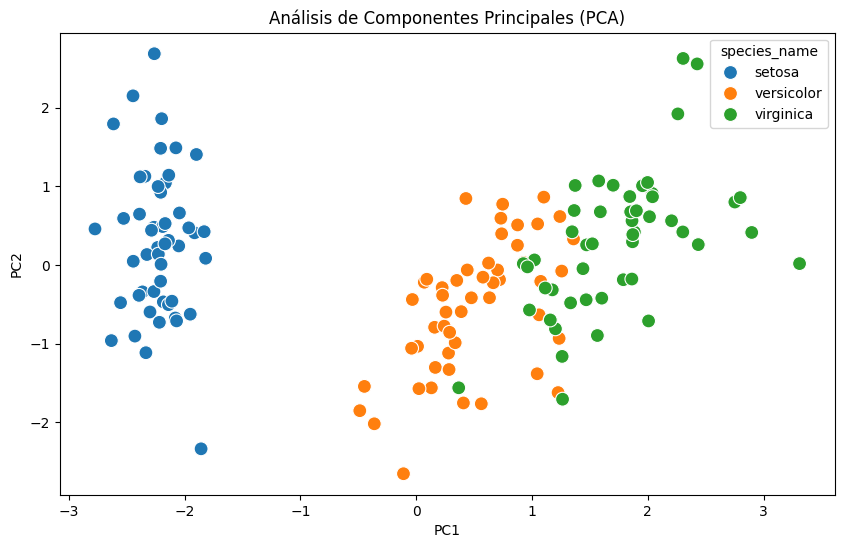

In [6]:
# %%
# Normalización de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[iris.feature_names])

# Convertir a DataFrame para visualización
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled['species_name'] = df['species_name']

print("Datos normalizados:")
display(df_scaled.head())

# %%
# Análisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species_name'] = df['species_name']

# Visualizar resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species_name', s=100)
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()

## 7. Ejercicios Prácticos


In [7]:
### Ejercicio 1:
# Crea una función que identifique las flores con longitudes de pétalo superiores a 5 cm y analice sus características promedio

# %%
def analyze_large_petals(df):
    large_petals = df[df['petal length (cm)'] > 5]
    print(f"Número de flores con pétalos largos: {len(large_petals)}")
    display(large_petals.groupby('species_name').mean())

analyze_large_petals(df)

Número de flores con pétalos largos: 42


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
species_name,,,,,
versicolor,6.000000,2.700000,5.100000,1.600000,1.0
virginica,6.739024,3.041463,5.702439,2.073171,2.0


In [8]:
### Ejercicio 2:
# Implementa un modelo de clustering (K-Means) para agrupar las flores y compara con las especies reales

# %%
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Comparar clusters con especies reales
df['cluster'] = clusters

# Matriz de confusión
conf_matrix = confusion_matrix(df['species'], df['cluster'])
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(df['species'], df['cluster']))

Matriz de Confusión:
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



In [9]:
### Ejercicio 3:
# Crea un modelo de regresión logística para predecir la especie de flor basado en sus características

# %%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir datos
X = df[iris.feature_names]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Evaluar
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar coeficientes
coef_df = pd.DataFrame(logreg.coef_, columns=iris.feature_names, index=iris.target_names)
print("\nCoeficientes del modelo:")
display(coef_df)

Precisión del modelo: 1.00

Coeficientes del modelo:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.405385,0.868922,-2.277875,-0.956801
versicolor,0.466427,-0.374879,-0.187453,-0.721271
virginica,-0.061041,-0.494044,2.465327,1.678072
